In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\Intellipaat Class\Capstone Project\Walmart.csv")
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
df.shape

(6435, 8)

In [4]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [7]:
df.describe(include='all')

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782   
std       12.988182         NaN  5.643666e+05      0.255049    18.444933   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000         NaN  5.533501e+05      0.000000    47.460000   
50%       23.000000         NaN  9.607460e+05      0.000000    62.670000   
75%       34.000000         NaN  1.420159e+06      0.000000    74.940000   
max       45.000000         NaN  3.818686e+06      1.000000   100.140000   

         Fuel_Price          CPI  Unemployment  
count   6435.000000  6435.000000   6435.000000  
unique          NaN          NaN           NaN  
top             NaN          NaN           NaN  
freq            NaN          NaN           NaN  
mean       3.358607   171.578394      7.999151  
std        0.459020    39.356712      1.875885  
min        2.472000   126.064000      3.879000  
25%        2.933000   131.735000      6.891000  
50%        3.445000   182.616521      7.874000  
75%        3.735000   212.743293      8.622000  
max        4.468000   227.232807     14.313000

In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.select_dtypes('object').columns

Index(['Date'], dtype='object')

In [11]:
df.Store.nunique()

45

In [12]:
df.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

# Treatment Of Outliers In Dataset

In [13]:
list_f = ['Weekly_Sales','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
list_n = len(list_f)

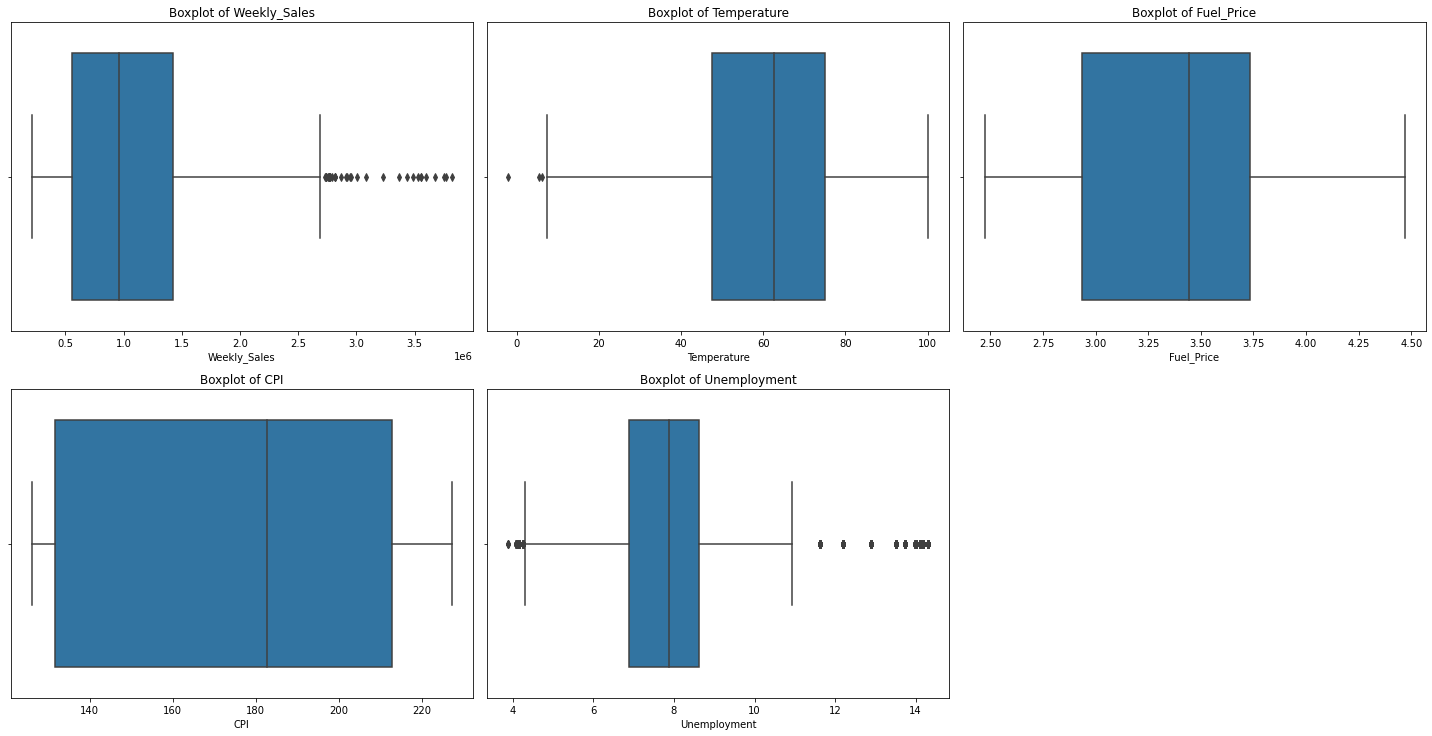

In [14]:
plt.figure(figsize=(20,15))
for i in range(list_n):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[list_f[i]], data=df)
    plt.title('Boxplot of {}'.format(list_f[i]))
    i = i+1
    plt.tight_layout()

from the above plots we can observe that Weekely_sales, Tempearture and Unemployment has Outliers. 
So we will try to treat these features

In [15]:
def treat_outliers():
    l_o = ['Weekly_Sales','Temperature','Unemployment']
    for i in l_o:
        Q1, Q3 = np.quantile(df[i], [0.25,0.75])
        IQR = Q3-Q1
        ll = Q1-1.5*IQR
        ul = Q3+1.5*IQR
        df[i] = np.where(df[i]>ul, ul, np.where(df[i]<ll, ll, df[i]))

In [16]:
treat_outliers()

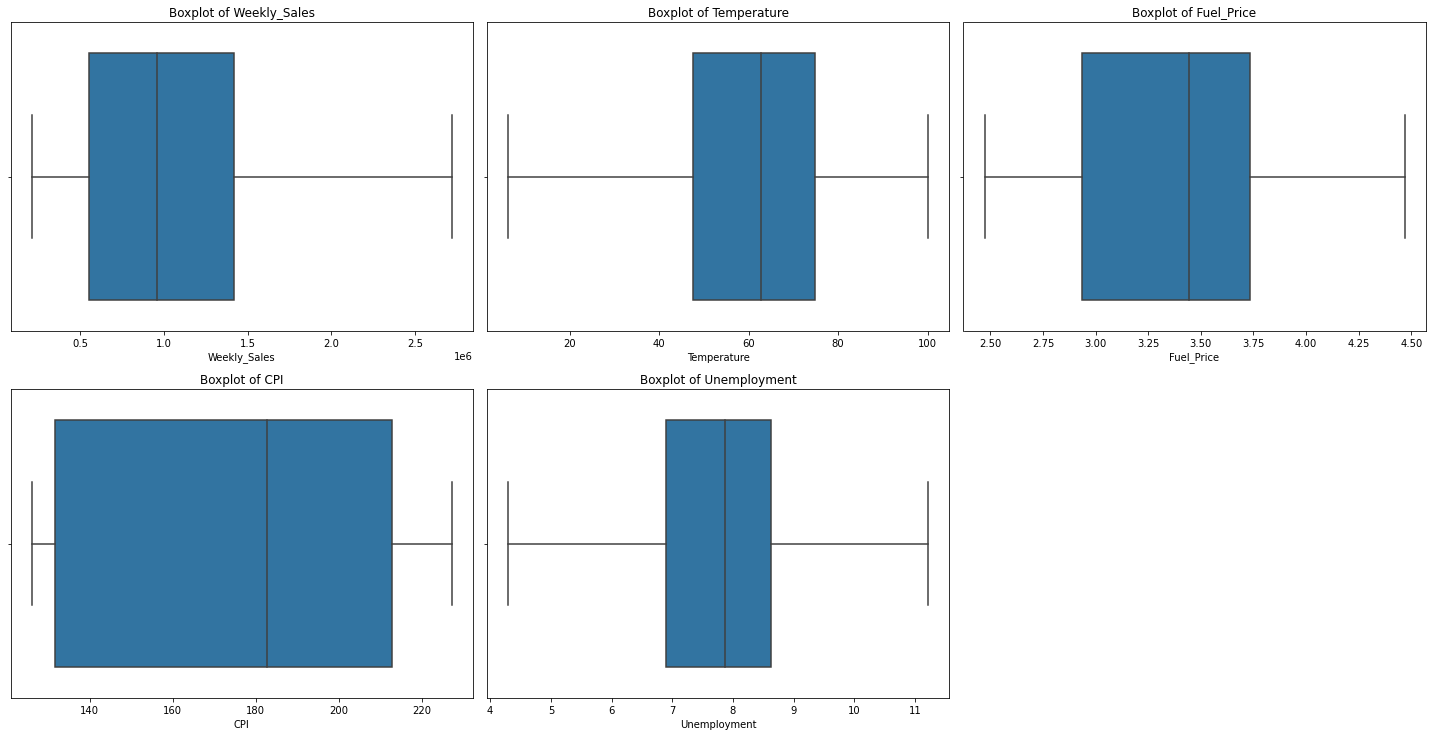

In [17]:
plt.figure(figsize=(20,15))
for i in range(list_n):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[list_f[i]], data=df)
    plt.title('Boxplot of {}'.format(list_f[i]))
    i = i+1
    plt.tight_layout()

now we can observer that we have successfully treated all the outliers in the data

In [18]:
#Now we will check the distribution of data for numerical columns

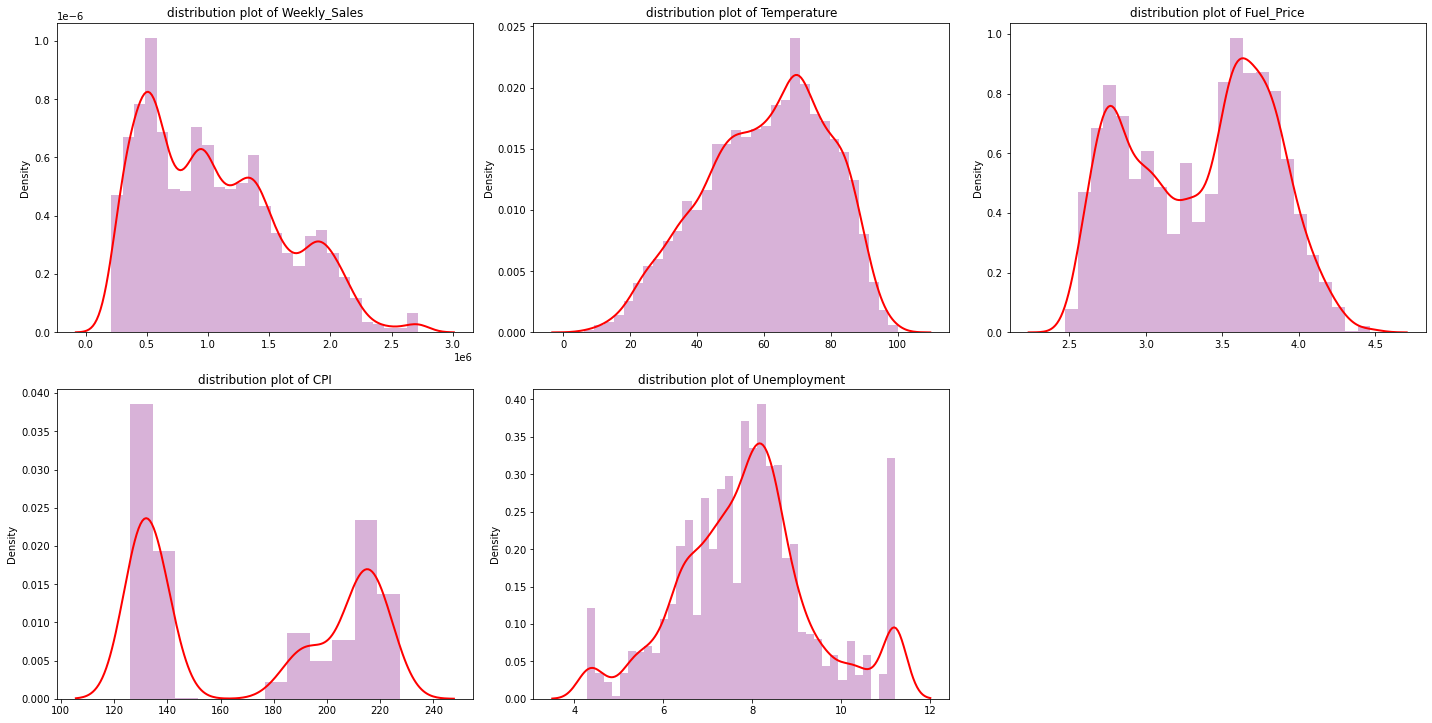

In [19]:
plt.figure(figsize=(20,15))
for i in range(list_n):
    plt.subplot(3,3,i+1)
    sns.distplot(x=df[list_f[i]], kde_kws={"color": "red", "lw": 2, "label": "KDE"}, 
                 hist_kws={ "linewidth": 2,"alpha": 0.3, "color": "purple"})
    plt.title('distribution plot of {}'.format(list_f[i]))
    i = i+1
    plt.tight_layout()

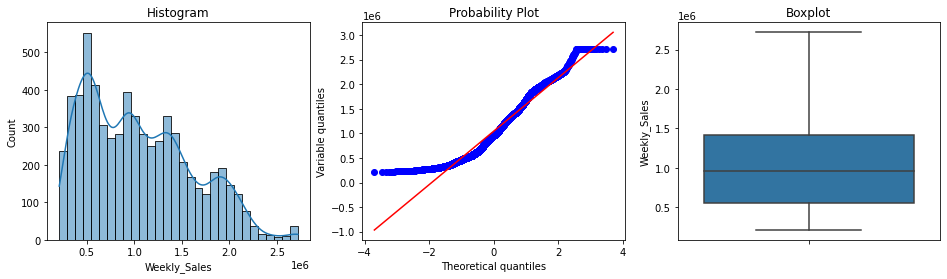

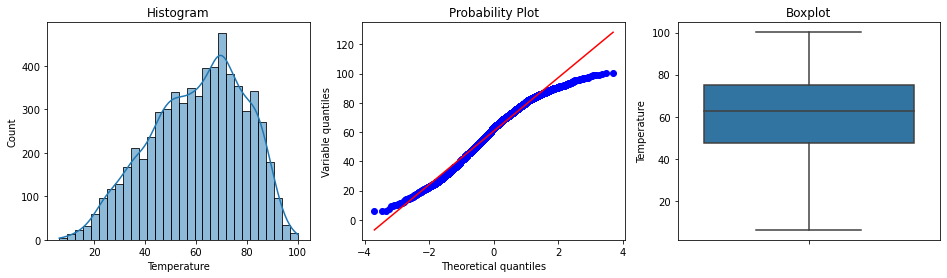

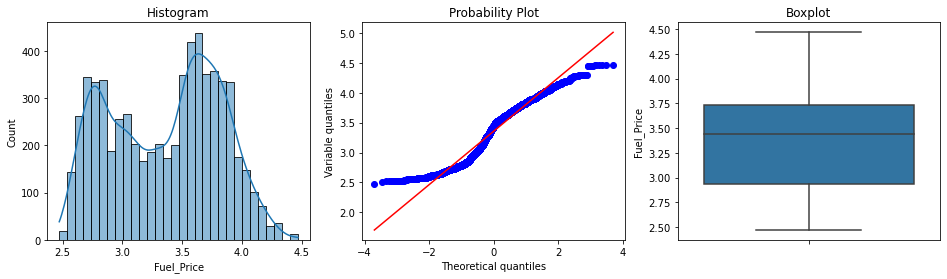

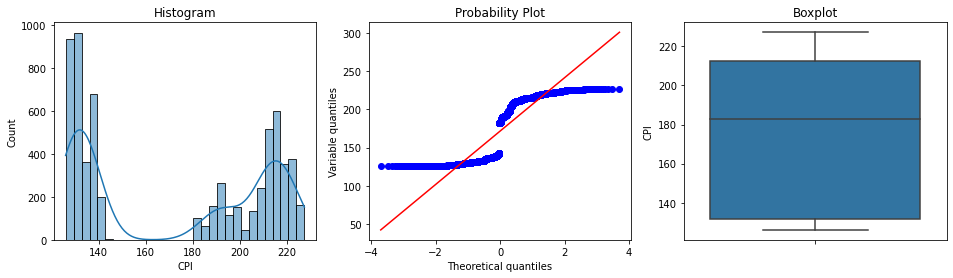

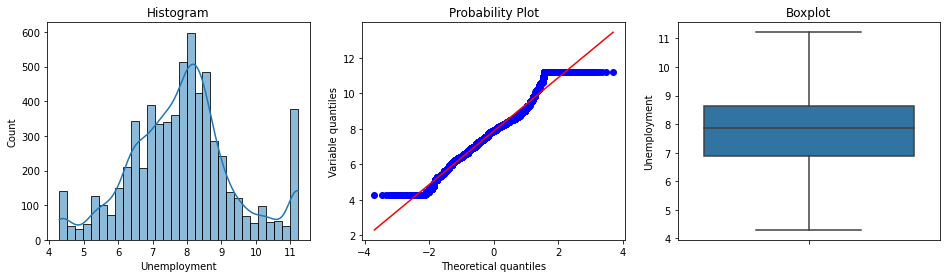

In [20]:
import scipy.stats as stats
for col in df.columns:
    if df[col].dtype !="O" and df[col].dtype !="int64":
        plt.figure(figsize=(16,4))
        
        plt.subplot(1,3,1)
        sns.histplot(data=df[col],bins=30, kde=True)
        plt.title("Histogram")
        
        plt.subplot(1,3,2)
        stats.probplot(df[col], dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')
        
        plt.subplot(1,3,3)
        sns.boxplot(y=df[col])
        plt.title("Boxplot")
        plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [22]:
df.Date=pd.to_datetime(df.Date,errors='coerce')
df['Weekday']=df.Date.dt.weekday
df['Month']=df.Date.dt.month
df['year']=df.Date.dt.year
df.head(2)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   

          CPI  Unemployment  Weekday  Month  year  
0  211.096358         8.106        6      5  2010  
1  211.242170         8.106        3     12  2010

In [23]:
df['year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: year, dtype: int64

Text(0.5, 1.0, 'Weekly_sales by Store')

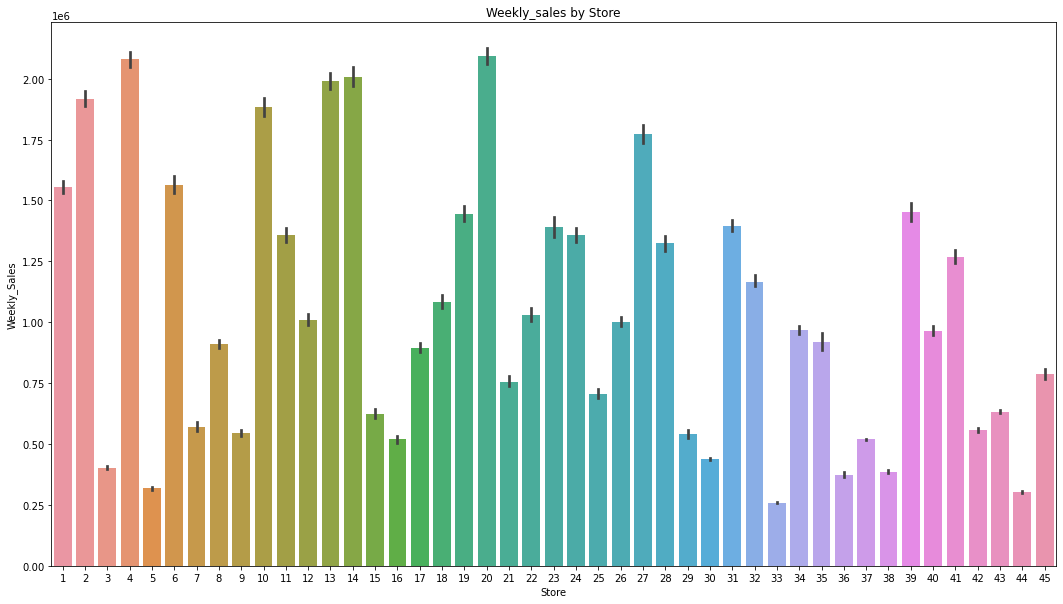

In [24]:
plt.figure(figsize=(18,10))
sns.barplot(x='Store', y='Weekly_Sales', data=df )
plt.title('Weekly_sales by Store')

From the above graph, we can say that on average sales in store 20 is the best and 4 and 14 following it and store 33 has very less sales followed by 5 and 44

In [25]:
df2010 = df[df['year']==2010]
df2011 = df[df['year']==2011]
df2012 = df[df['year']==2012]

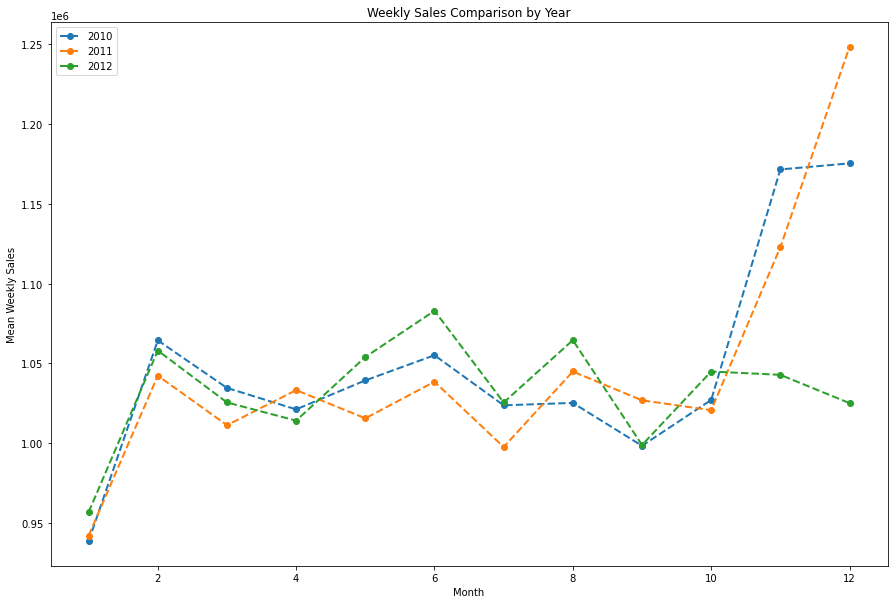

In [26]:
plt.figure(figsize=(15,10))
# Plotting for 2011
df2010.groupby('Month')['Weekly_Sales'].mean().plot(linewidth=2, style='--o', label='2010')

# Plotting for 2011
df2011.groupby('Month')['Weekly_Sales'].mean().plot(linewidth=2, style='--o', label='2011')

# Plotting for 2012
df2012.groupby('Month')['Weekly_Sales'].mean().plot(linewidth=2, style='--o', label='2012')

plt.title('Weekly Sales Comparison by Year')
plt.xlabel('Month')
plt.ylabel('Mean Weekly Sales')
plt.legend()
plt.show()

from the above graph we can say that in year 2010 and 2011 the december month has highest sales in that 2011 has very high comparatively. 
so for years 2010 and 2011 January month has very low saleas and december has high where as for year 2012 in january very less sales and in june high sales

Text(0.5, 1.0, 'Annual Sales')

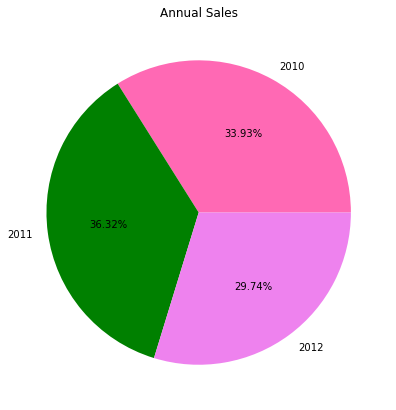

In [27]:
plt.figure(figsize=(7,7))
plt.pie(df.groupby('year')['Weekly_Sales'].sum(),labels=df['year'].unique(),normalize=True,autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('Annual Sales')

from the above graph we can say that 2011 has highest sales then followed by 2010 and 2012

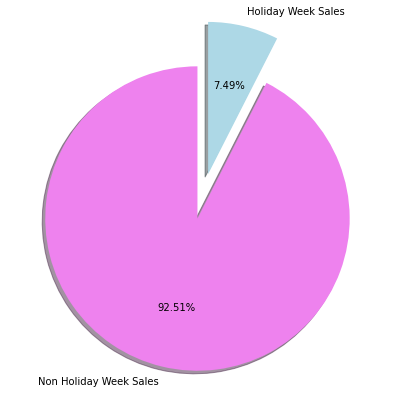

In [28]:
plt.figure(figsize=(7,7))
df1 = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df1['Weekly_Sales'],labels= ['Non Holiday Week Sales','Holiday Week Sales'],normalize=True,autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['violet','lightblue'])
plt.show()

so we can see Sales in Non holiday week are comparitively High since their may be a chance of number of holiday weeks are less

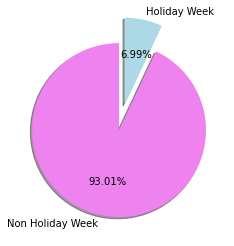

In [29]:
plt.pie(x=df['Holiday_Flag'].value_counts(),labels= ['Non Holiday Week','Holiday Week'],normalize=True,autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['violet','lightblue'])
plt.show()

the number of holiday weeks are approx 7 percent of the whole data

In [30]:
df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

Holiday_Flag  Weekly_Sales
0             0  6.220935e+09
1             1  5.038284e+08

<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

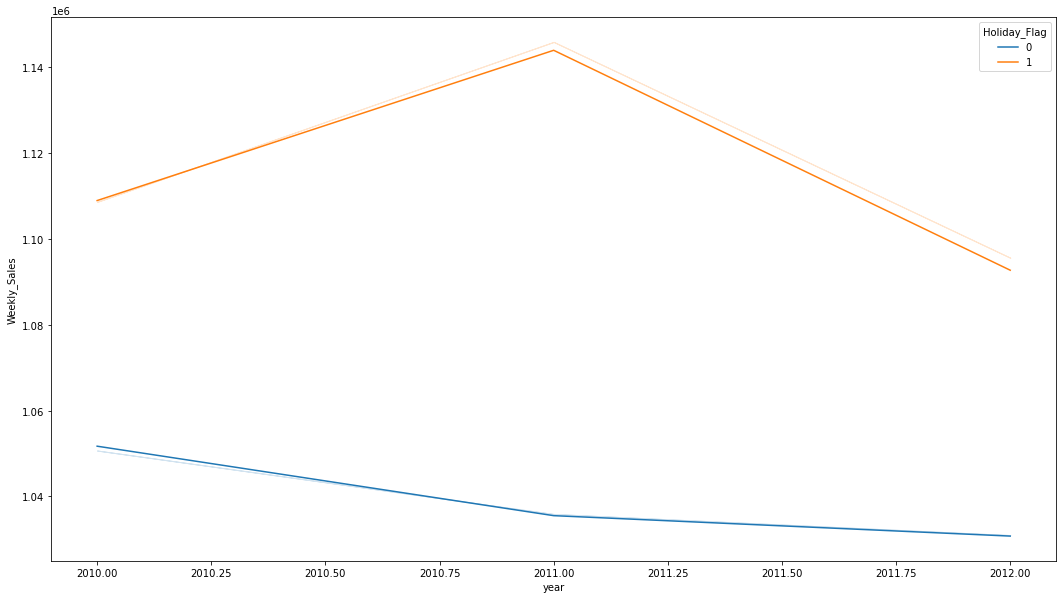

In [31]:
plt.figure(figsize=(18,10))

sns.lineplot(data = df, x = "year" ,y = "Weekly_Sales"  , hue = df.Holiday_Flag , ci = False )

from the above graph the Weekely sales are high in Holiday week compared to non holiday week for all the data

In [32]:
import plotly.express as px
fig = px.histogram(df, x='Unemployment', y ='Weekly_Sales', marginal='box', title = 'How Unemployment affect sales', template='simple_white')
fig.show()

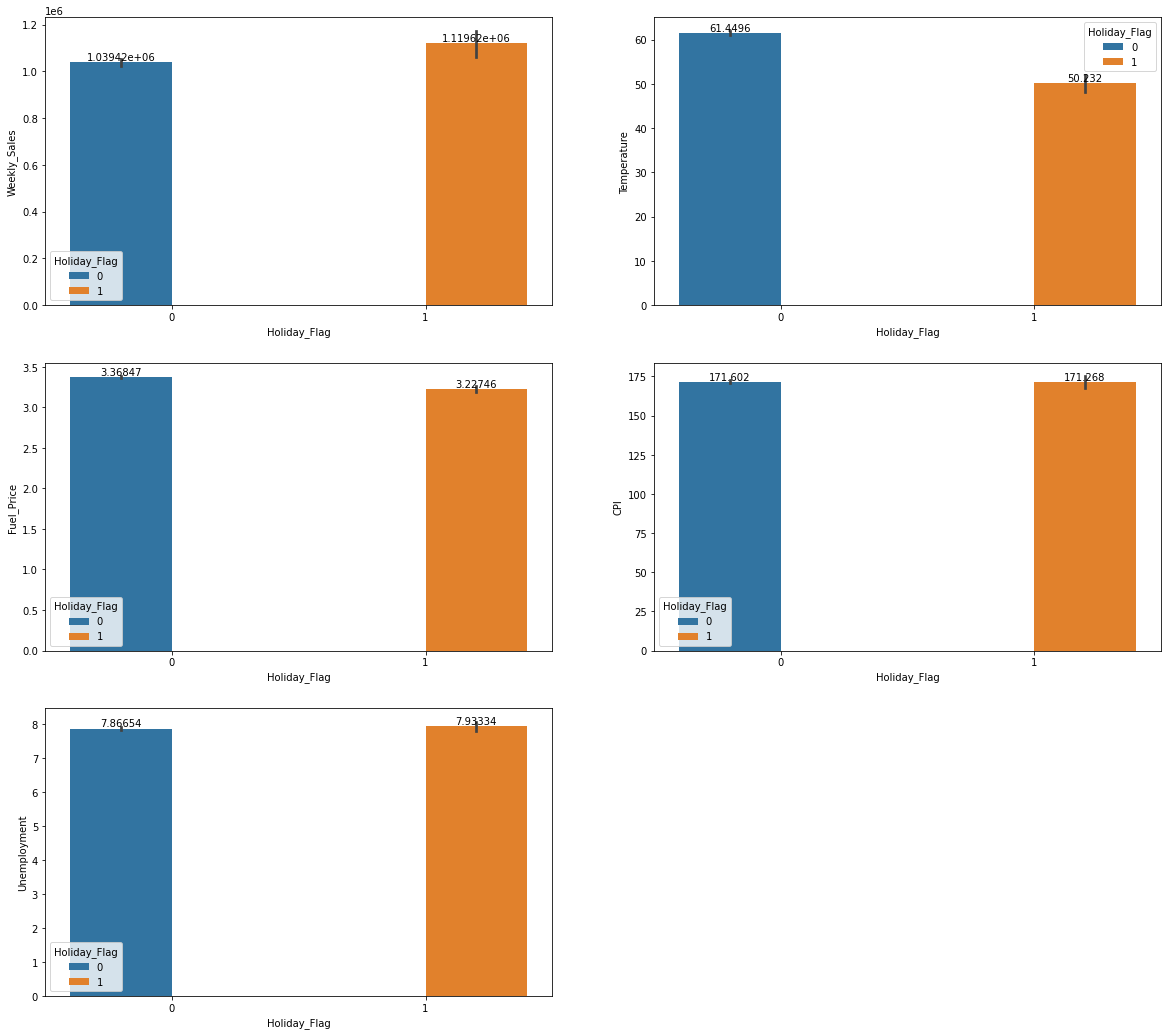

In [33]:
from numpy import mean

plt.figure(figsize=(20,18))
for i in range(list_n):
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data = df , x = "Holiday_Flag" ,y = list_f[i]  , hue = df.Holiday_Flag ,estimator=mean);
    i+=1
            
    for i in ax.containers:     #to set a label on top of the bars.
        ax.bar_label(i,)
            

# pair plot of features

<Figure size 2160x1440 with 0 Axes>

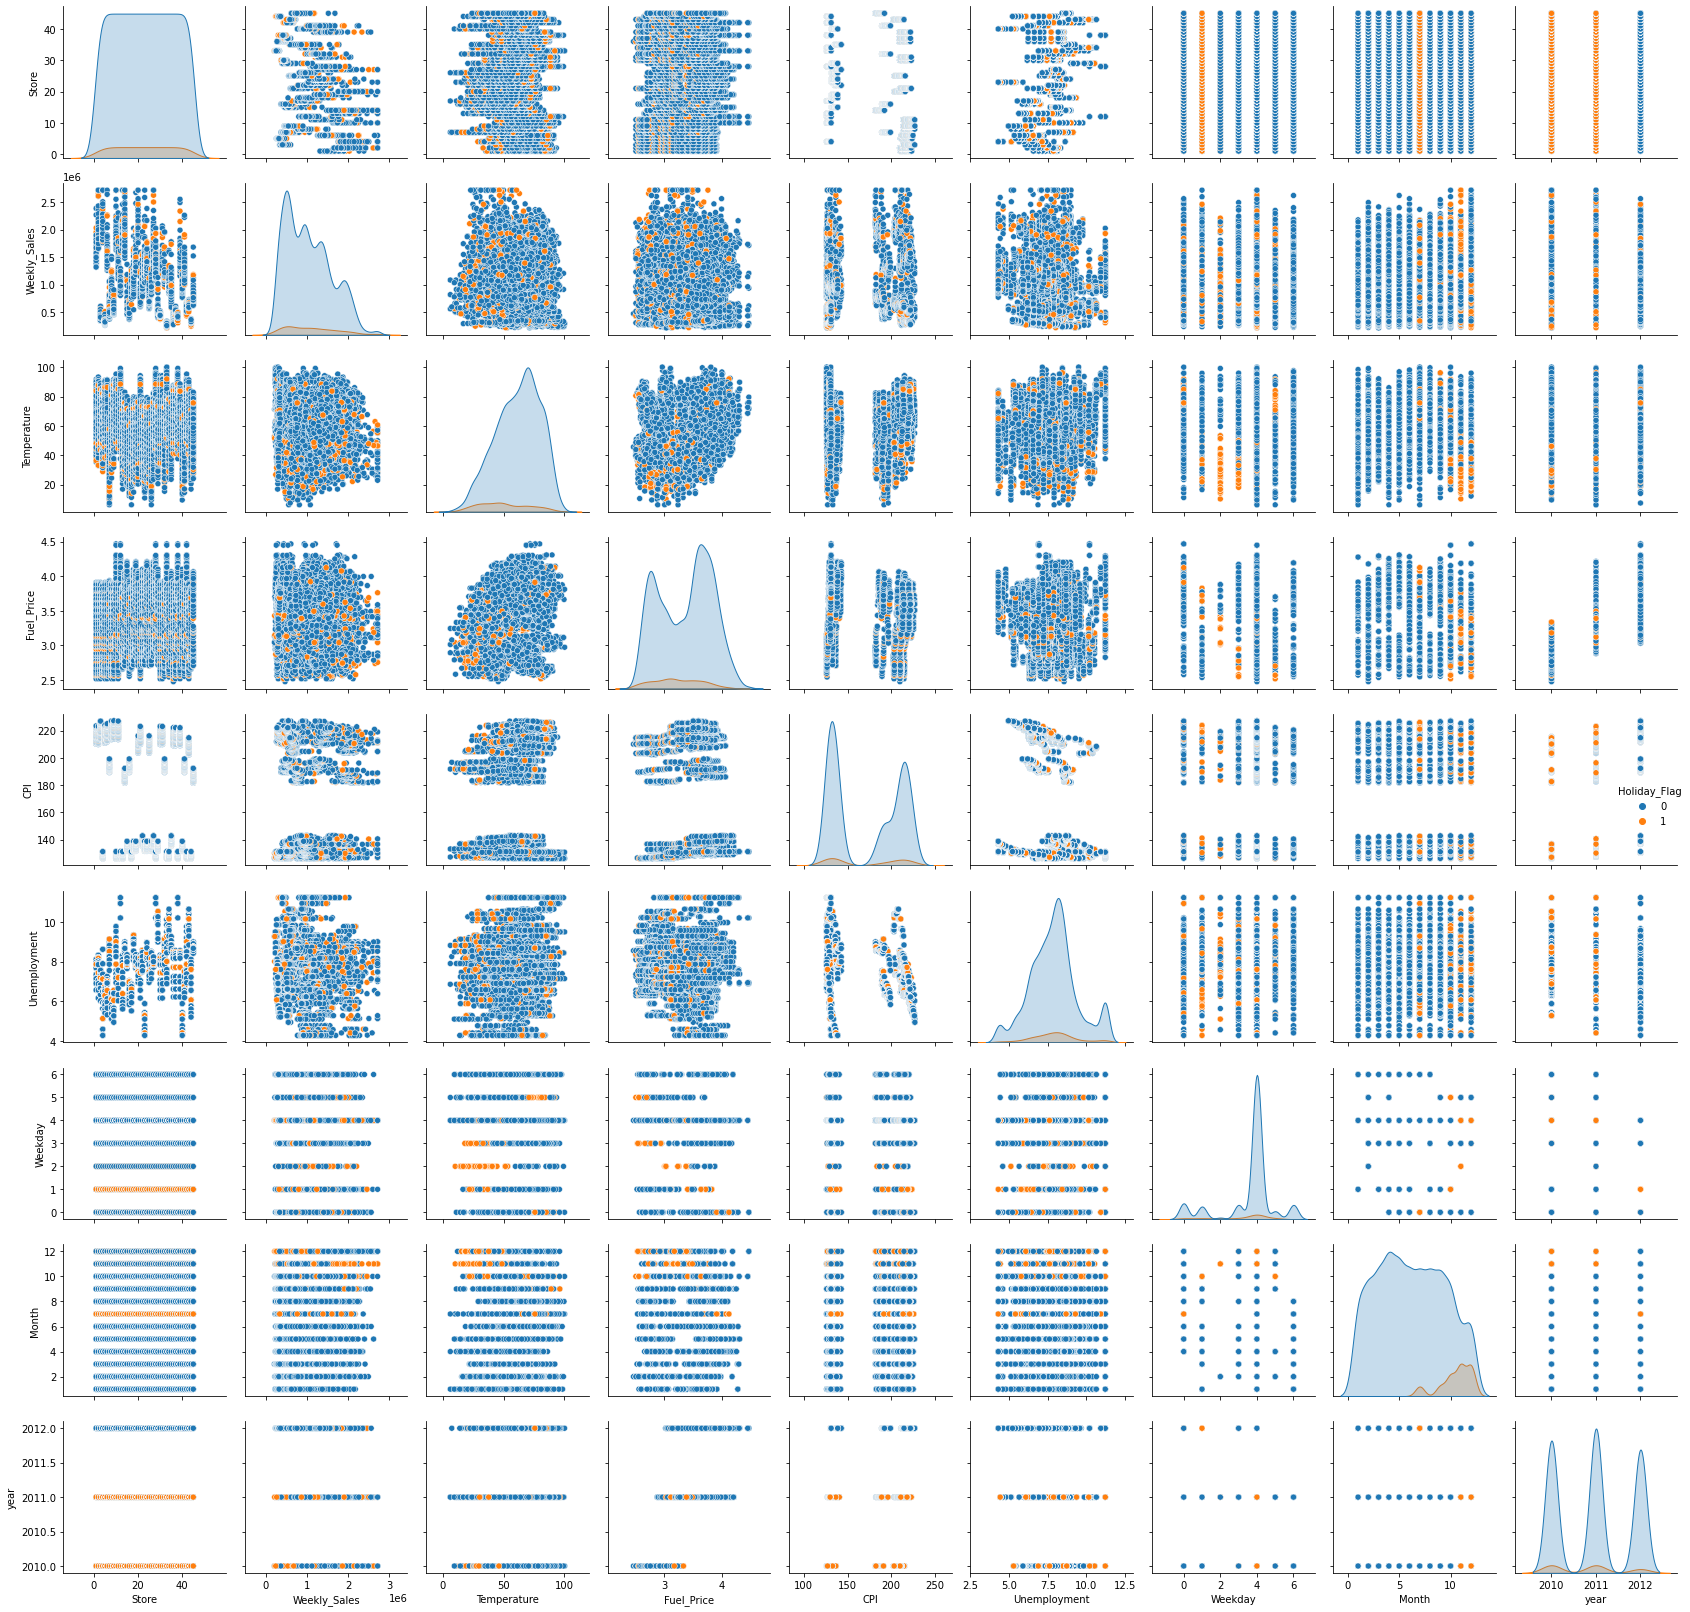

In [34]:
plt.figure(figsize=(30,20))
sns.pairplot(df, hue='Holiday_Flag')
plt.tight_layout()

In [34]:
df.corr()

Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.336559 -4.386841e-16    -0.022749   
Weekly_Sales -3.365589e-01      1.000000  3.670284e-02    -0.060808   
Holiday_Flag -4.386841e-16      0.036703  1.000000e+00    -0.155149   
Temperature  -2.274937e-02     -0.060808 -1.551494e-01     1.000000   
Fuel_Price    6.002295e-02      0.010998 -7.834652e-02     0.144962   
CPI          -2.094919e-01     -0.072627 -2.162091e-03     0.176960   
Unemployment  2.559643e-01     -0.108662  1.120376e-02     0.088315   
Weekday      -2.243183e-15     -0.022328 -9.100474e-02     0.018408   
Month         6.289676e-16      0.062744  3.322341e-01     0.066394   
year          3.474318e-12     -0.016344 -5.678257e-02     0.064288   

              Fuel_Price       CPI  Unemployment       Weekday         Month  \
Store           0.060023 -0.209492      0.255964 -2.243183e-15  6.289676e-16   
Weekly_Sales    0.010998 -0.072627     -0.108662 -2.232792e-02  6.274356e-02   
Holiday_Flag   -0.078347 -0.002162      0.011204 -9.100474e-02  3.322341e-01   
Temperature     0.144962  0.176960      0.088315  1.840750e-02  6.639379e-02   
Fuel_Price      1.000000 -0.170642     -0.053428 -2.651216e-02 -5.283174e-02   
CPI            -0.170642  1.000000     -0.278542 -9.595877e-03  1.478843e-03   
Unemployment   -0.053428 -0.278542      1.000000  3.822152e-02 -2.635815e-03   
Weekday        -0.026512 -0.009596      0.038222  1.000000e+00 -1.387259e-01   
Month          -0.052832  0.001479     -0.002636 -1.387259e-01  1.000000e+00   
year            0.779470  0.074796     -0.252638 -9.923791e-02 -1.390145e-01   

                      year  
Store         3.474318e-12  
Weekly_Sales -1.634436e-02  
Holiday_Flag -5.678257e-02  
Temperature   6.428798e-02  
Fuel_Price    7.794703e-01  
CPI           7.479573e-02  
Unemployment -2.526376e-01  
Weekday      -9.923791e-02  
Month        -1.390145e-01  
year          1.000000e+00

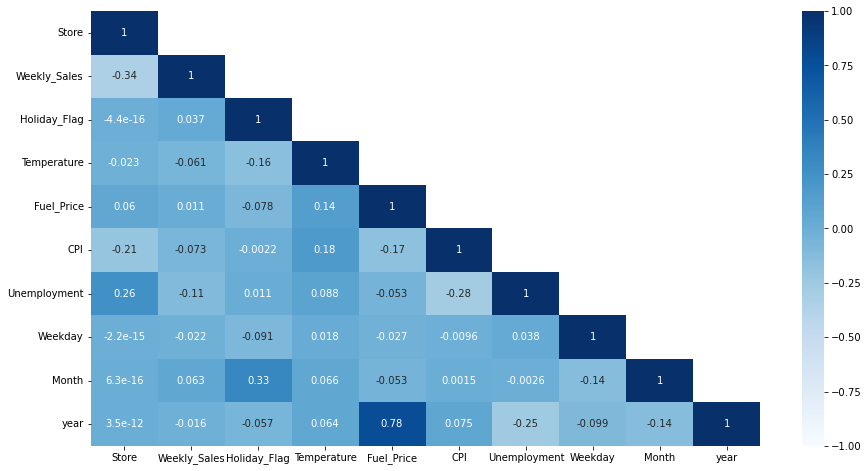

In [35]:
df_corr=df.corr()
plt.figure(figsize=(15,8))
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='Blues');

<AxesSubplot:>

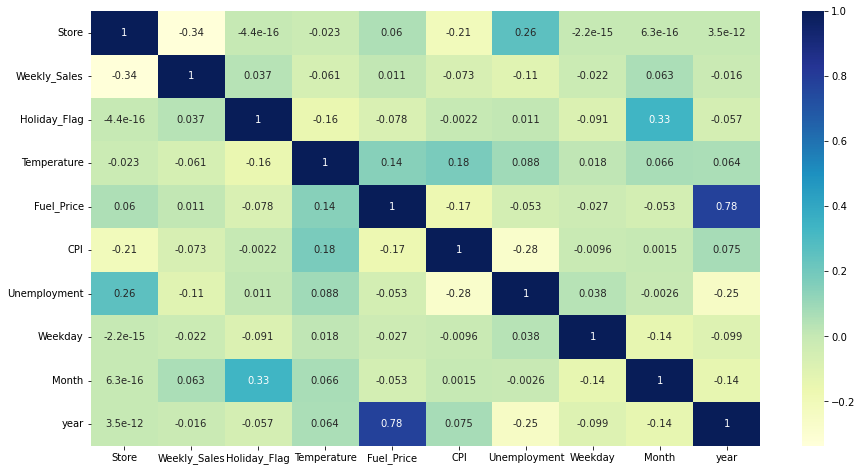

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

In [37]:
df.sort_values(by=['Date'],inplace=True)
df.set_index(df.Date, inplace=True)
df.head(2)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                    
2010-01-10      5 2010-01-10     283178.12             0        71.10   
2010-01-10     15 2010-01-10     566945.95             0        59.69   

            Fuel_Price         CPI  Unemployment  Weekday  Month  year  
Date                                                                    
2010-01-10       2.603  212.226946         6.768        6      1  2010  
2010-01-10       2.840  132.756800         8.067        6      1  2010

In [38]:
df.drop(['Date'], axis=1, inplace=True)

In [39]:
df.head(2)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-01-10      5     283178.12             0        71.10       2.603   
2010-01-10     15     566945.95             0        59.69       2.840   

                   CPI  Unemployment  Weekday  Month  year  
Date                                                        
2010-01-10  212.226946         6.768        6      1  2010  
2010-01-10  132.756800         8.067        6      1  2010

# Scaling Data For Machine Learning

In [40]:
X = df.drop(["Weekly_Sales"], axis=1)
y = df["Weekly_Sales"]

In [41]:
X.tail()

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  \
Date                                                                   
2012-12-10     41             0        39.38       3.760  199.053937   
2012-12-10     16             0        43.26       3.760  199.053937   
2012-12-10     10             0        76.03       4.468  131.108333   
2012-12-10     25             0        43.74       4.000  216.115057   
2012-12-10      2             0        60.97       3.601  223.015426   

            Unemployment  Weekday  Month  year  
Date                                            
2012-12-10         6.195        0     12  2012  
2012-12-10         5.847        0     12  2012  
2012-12-10         6.943        0     12  2012  
2012-12-10         7.293        0     12  2012  
2012-12-10         6.170        0     12  2012

In [42]:
#importing Standard Scaler

from sklearn.preprocessing import StandardScaler  

In [43]:
st = StandardScaler()

In [44]:
X = st.fit_transform(X)

In [45]:
pd.DataFrame(X)

0         1         2         3         4         5         6  \
0    -1.385983 -0.274204  0.565908 -1.646260  1.032904 -0.725520  1.701103   
1    -0.615992 -0.274204 -0.052887 -1.129902 -0.986480  0.128762  1.701103   
2     1.462982 -0.274204  1.374517 -0.779127 -1.152213  0.744318  1.701103   
3     0.769991 -0.274204  1.669542 -0.779127 -1.152213  0.916621  1.701103   
4     1.000988 -0.274204  0.758976 -1.724694  0.987508  0.397739  1.701103   
...        ...       ...       ...       ...       ...       ...       ...   
6430  1.385983 -0.274204 -1.154352  0.874525  0.698170 -1.102351 -2.505083   
6431 -0.538993 -0.274204 -0.943929  0.874525  0.698170 -1.331212 -2.505083   
6432 -1.000988 -0.274204  0.833275  2.417063 -1.028369 -0.610432 -2.505083   
6433  0.153998 -0.274204 -0.917898  1.397419  1.131703 -0.380256 -2.505083   
6434 -1.616980 -0.274204  0.016531  0.528108  1.307046 -1.118792 -2.505083   

             7         8  
0    -1.648490 -1.210899  
1    -1.648490 -1.210899  
2    -1.648490 -1.210899  
3    -1.648490 -1.210899  
4    -1.648490 -1.210899  
...        ...       ...  
6430  1.663228  1.298645  
6431  1.663228  1.298645  
6432  1.663228  1.298645  
6433  1.663228  1.298645  
6434  1.663228  1.298645  

[6435 rows x 9 columns]

# Spliting Data in Train Test

In [46]:
#importing train test split to split data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.3 , random_state = 0)

In [47]:
print(X_train.shape, y_train.shape)

(4504, 9) (4504,)


In [48]:
print(X_test.shape, y_test.shape)

(1931, 9) (1931,)


# Performing the different Models 

# 1. Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred_lr = LR.predict(X_test)

In [51]:
y_pred_lr

array([1209890.14798727,  903265.15861127,  801489.63856552, ...,
        633887.56647017, 1257806.37393168, 1292258.09262173])

In [52]:
#evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
#mean squared error
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(mse_lr)

269055535397.49606


In [54]:
#mean absolute error
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(mae_lr)

430082.46142283577


In [55]:
#r2 score 
r2_lr = r2_score(y_test, y_pred_lr)
print(r2_lr)

0.11709180262896657


# 2. Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor
DTR =  DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [57]:
y_pred_dtr = DTR.predict(X_test)

In [58]:
y_pred_dtr

array([ 561625.92,  770157.29, 1142499.25, ...,  625196.14, 1513080.49,
       1524390.07])

In [59]:
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print(mse_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
print(mae_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
print(r2_dtr)

26123017588.56429
88229.18417141377
0.9142770791355898


# 3. Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [61]:
y_pred_rfr = RFR.predict(X_test)
y_pred_rfr

array([ 546828.9012,  942070.9876, 1163085.9661, ...,  664455.3572,
       1482970.6419, 1626097.235 ])

In [62]:
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print(mse_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
print(mae_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)
print(r2_rfr)

15596711699.478714
68979.74468214653
0.9488192480739773


# 4. KNN Model

In [63]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [64]:
y_pred_knn = KNN.predict(X_test)
y_pred_knn

array([ 780684.154,  914448.866,  476159.304, ...,  712634.424,
       1623220.746, 1413999.666])

In [65]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(mae_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(r2_knn)

198467115962.95242
330348.53733764886
0.3487283458658442


# 5. SVM

In [66]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train , y_train)

SVR()

In [67]:
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([958608.4165284 , 958594.7228004 , 958537.50634237, ...,
       958563.6413178 , 958625.30289309, 958614.98790844])

In [68]:
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(mse_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
print(mae_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(r2_svm)

310956497933.9558
458691.73258088005
-0.02040658872180723


# 6. Gradient Boost

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(X_train , y_train)

GradientBoostingRegressor()

In [70]:
y_pred_gbr = GBR.predict(X_test)
y_pred_gbr

array([ 644803.20843938,  971630.77288212, 1174582.28038995, ...,
        677922.4167974 , 1475305.82771346, 1474971.33589048])

In [71]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(mae_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(r2_gbr)

37357800371.16224
144141.47574142655
0.8774100367988313


# 7. XG Boost

In [72]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [73]:
y_pred_xgb = XGB.predict(X_test)
y_pred_xgb

array([ 581817.6 ,  918260.8 , 1283051.8 , ...,  671610.75, 1487988.2 ,
       2020395.2 ], dtype=float32)

In [74]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(mae_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(r2_xgb)

8911300090.698063
59574.72272964138
0.9707574873429503


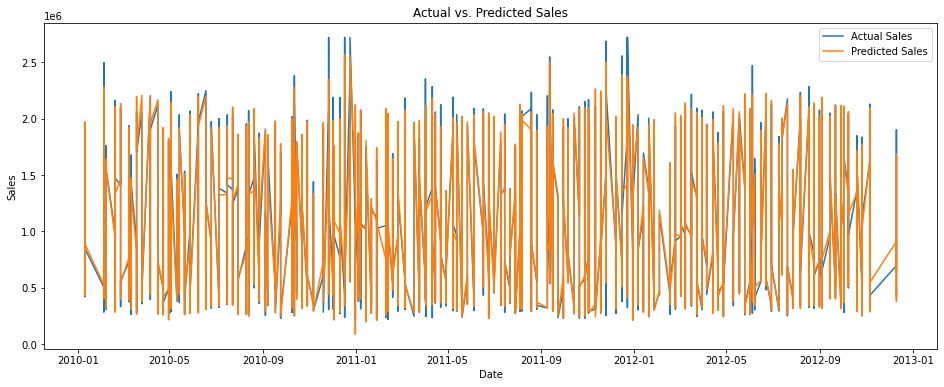

In [75]:
plt.figure(figsize=(16, 6))
y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred_xgb, index=y_test.index).sort_index()
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Sales')
plt.plot(y_pred_sorted.index, y_pred_sorted, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

In [76]:
from datetime import datetime, timedelta

In [77]:
X = df.drop(["Weekly_Sales"], axis=1)

In [78]:
last_date = df.index.max()  # Get the last available date in the dataset
future_dates = pd.date_range(start=last_date + timedelta(weeks=1), periods=12, freq='W')  # Generate next 12 weeks of dates

# Generate features for the future predictions
future_data = pd.DataFrame(index=future_dates, columns=X.columns)
future_data['Month'] = future_data.index.month


In [79]:
# Convert object columns to numerical types
numerical_columns = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekday', 'year']
future_data[numerical_columns] = future_data[numerical_columns].astype(float)

# Continue with the remaining steps of data preprocessing, splitting the data, and training the XGBoost model.


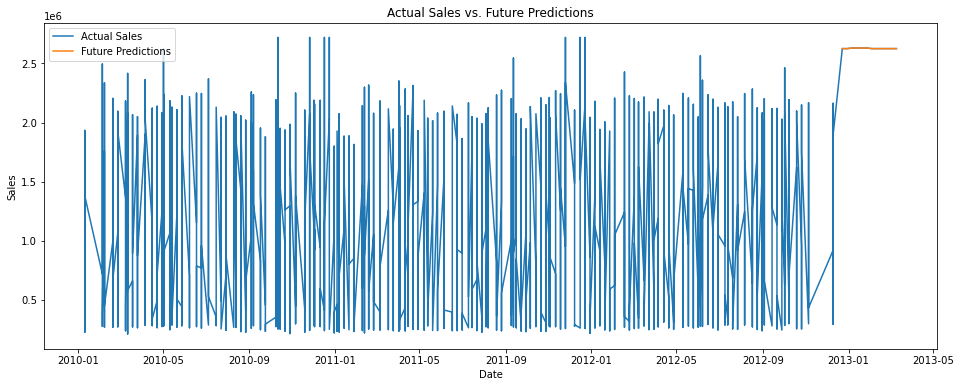

<Figure size 432x288 with 0 Axes>

In [80]:
# Make predictions for the future period
future_predictions = XGB.predict(future_data)

# Combine original sales data and future sales predictions
combined_data = pd.concat([df['Weekly_Sales'], pd.Series(future_predictions, index=future_dates)])

# Plot actual sales data and future sales predictions
plt.figure(figsize=(16, 6))
plt.plot(combined_data.index, combined_data.values, label='Actual Sales')
plt.plot(future_dates, future_predictions, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs. Future Predictions')
plt.legend()
plt.show()
plt.tight_layout()

In [81]:
x_train = pd.DataFrame(X_train, columns=['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Weekday', 'Month', 'year'])

In [82]:
feature_imp = pd.Series(XGB.feature_importances_,
                        index = x_train.columns).sort_values(ascending=False)
feature_imp*100

Store           55.861813
Unemployment    18.114187
CPI             13.276559
Weekday          3.415606
Holiday_Flag     3.194737
Month            3.052477
year             1.110409
Temperature      1.018584
Fuel_Price       0.955634
dtype: float32

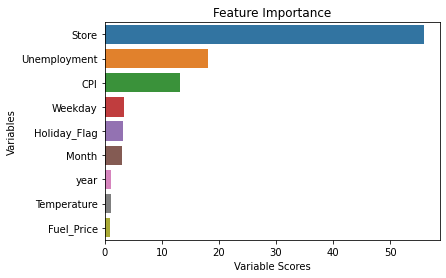

In [83]:
sns.barplot(x= feature_imp*100, y = feature_imp.index)
plt.xlabel("Variable Scores")
plt.ylabel("Variables")
plt.title("Feature Importance")
plt.show()

# 8. XG Boost with GridsearchCV

In [85]:
# Define the parameter grid for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...n=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
   

In [86]:
# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}


In [87]:
# Get the best model
best_model = grid_search.best_estimator_

In [88]:
# Evaluate the best model on the test data
accuracy = best_model.score(X_test, y_test)
print("Accuracy of the best model: ", accuracy)

Accuracy of the best model:  0.9735032990212555


In [89]:
y_pred_xgbg = best_model.predict(X_test)

In [90]:
mse_xgbg = mean_squared_error(y_test, y_pred_xgbg)
print(mse_xgbg)
mae_xgbg = mean_absolute_error(y_test, y_pred_xgbg)
print(mae_xgbg)
r2_xgbg = r2_score(y_test, y_pred_xgbg)
print(r2_xgbg)

8074547375.742088
56173.82727035862
0.9735032990212555


In [91]:
feature_imp = pd.Series(best_model.feature_importances_,
                        index = x_train.columns).sort_values(ascending=False)
feature_imp*100

Store           52.980125
Unemployment    18.012630
CPI             13.704352
Holiday_Flag     4.557919
Weekday          3.924367
Month            3.844939
year             1.091376
Fuel_Price       0.954068
Temperature      0.930226
dtype: float32

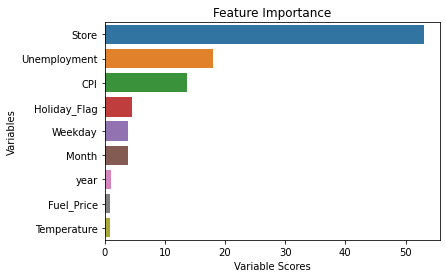

In [92]:
sns.barplot(x= feature_imp*100, y = feature_imp.index)
plt.xlabel("Variable Scores")
plt.ylabel("Variables")
plt.title("Feature Importance")
plt.show()

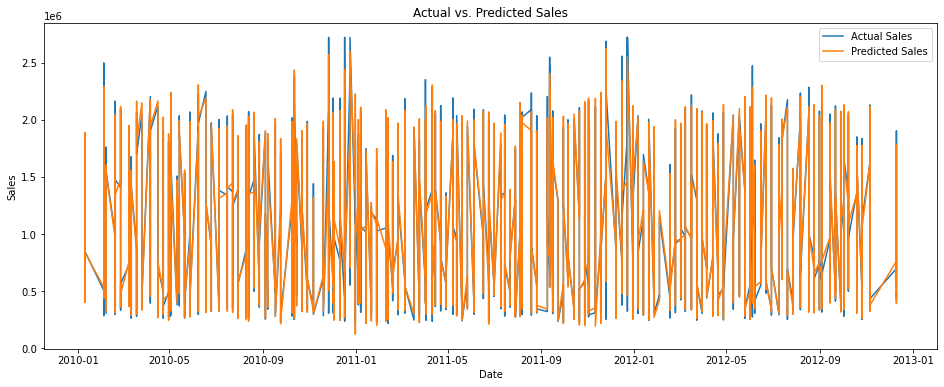

In [93]:
plt.figure(figsize=(16, 6))
y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred_xgbg, index=y_test.index).sort_index()
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Sales')
plt.plot(y_pred_sorted.index, y_pred_sorted, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

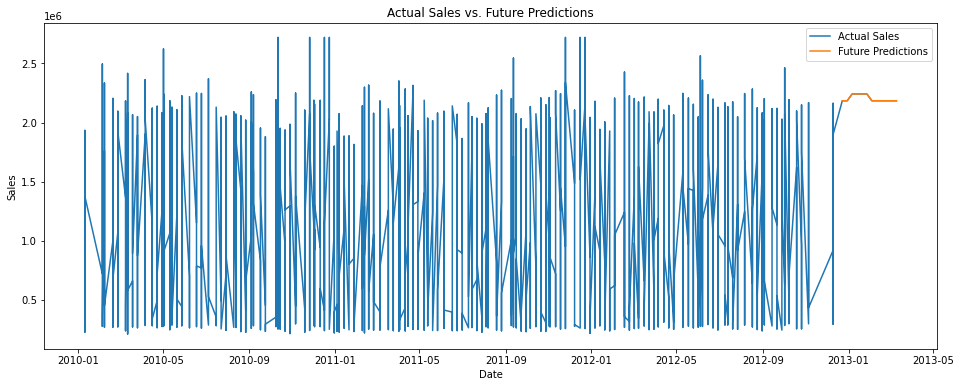

<Figure size 432x288 with 0 Axes>

In [94]:
# Make predictions for the future period
future_predictions = best_model.predict(future_data)

# Combine original sales data and future sales predictions
combined_data = pd.concat([df['Weekly_Sales'], pd.Series(future_predictions, index=future_dates)])

# Plot actual sales data and future sales predictions
plt.figure(figsize=(16, 6))
plt.plot(combined_data.index, combined_data.values, label='Actual Sales')
plt.plot(future_dates, future_predictions, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs. Future Predictions')
plt.legend()
plt.show()
plt.tight_layout()

In [95]:
future_predictions

array([2184608.5, 2184608.5, 2242100.5, 2242100.5, 2242100.5, 2242100.5,
       2184608.5, 2184608.5, 2184608.5, 2184608.5, 2184608.5, 2184608.5],
      dtype=float32)

In [96]:
# Comparing all the models :
n = ['Linear Regression','Decision Tree','Random Forest','KNN','SVM','Gradient Boost','XG Boost','XG Boost with GridCV']
val = [mse_lr,mse_dtr,mse_rfr,mse_knn, mse_svm, mse_gbr, mse_xgb, mse_xgbg]
val_1 = [r2_lr,r2_dtr,r2_rfr,r2_knn,r2_svm,r2_gbr,r2_xgb,r2_xgbg]
compare_df = pd.DataFrame(data=[n,val,val_1]).T

In [97]:
compare_df.columns = ['Models','RMSE Score','R_Sqaured Value']
compare_df.sort_values('R_Sqaured Value',inplace = True,ascending=False)
compare_df.reset_index(drop=True)

Models           RMSE Score R_Sqaured Value
0  XG Boost with GridCV    8074547375.742088        0.973503
1              XG Boost    8911300090.698063        0.970757
2         Random Forest   15596711699.478714        0.948819
3         Decision Tree   26123017588.564289        0.914277
4        Gradient Boost   37357800371.162239         0.87741
5                   KNN  198467115962.952423        0.348728
6     Linear Regression  269055535397.496063        0.117092
7                   SVM  310956497933.955811       -0.020407

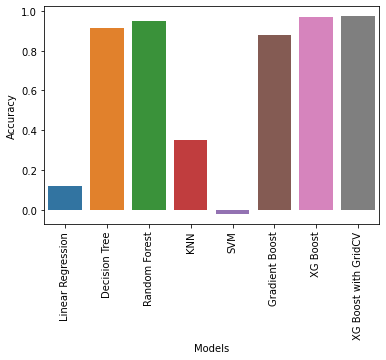

In [98]:
sns.barplot(n, val_1)
plt.xticks(rotation='vertical')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

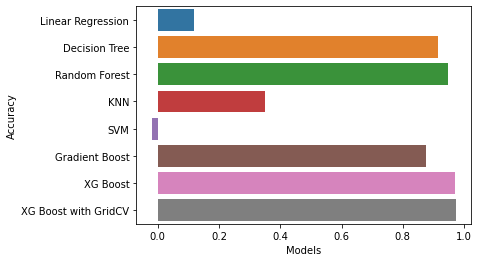

In [104]:
sns.barplot(val_1, n, orient='h')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()